### LSE Data Analytics Online Career Accelerator 

# Project Title

# Assignment Scenario

### GREATER LONDON AUTHORITY (GLA) PROJECT TO ASSESS CYCLING IN LONDON, AND SUGGEST HOW TO INCREASE LONDON CYCLING.

### Understand the changes in cycling behaviour 2018-2023, and how it might have been impacted by the MTS policies. 
### Inform decisions to adjust the MTS and policies to enhance cycling uptake in London.


## 1.3) Imports and Downloads.

In [1]:
# Import useful packages for DataFrames.  
import pandas as pd
import numpy as np
import datetime as dt
import time

# Import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import *
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

# Import API useful packages
import requests
import json
import dotenv
from bs4 import BeautifulSoup
from dotenv import load_dotenv
from io import StringIO

# Import other useful packages
import timeit
import math

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import the necessary package.
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

# The Elbow method.
# Import the KMeans class.
from sklearn.cluster import KMeans

# The Silhouette method.
# Import the silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Import all the necessary packages.
import nltk 

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Install the required tokenisation model.
nltk.download('punkt')
# Download the stopwords.
nltk.download('stopwords')
# Download the resource.
nltk.download('wordnet')
# Import the Counter class.
from collections import Counter

from nltk.corpus import words
nltk.download('stopwords')
nltk.download('words')

# Import the necessary package.
from textblob import TextBlob

# Import the vader class SentimentIntensityAnalyser.
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pkg_resources

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/haticegormez/nltk_data...
[nltk_data]   Package words is already up-to-date!


# 2.0) Load the data into DataFrames.

## 2.1) Set general parameters for the private GitHub API request.

## 2.2) Load London cycling data from given Employer Project data.

In [2]:
# Define specific filepaths for the two CSV files.
name_filepath_1 = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/Central London_1.csv'
name_filepath_2 = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/Central London_2.csv'

# Read the first CSV file into a DataFrame
central_london_1 = pd.read_csv(name_filepath_1)

# Read the second CSV file into another DataFrame
central_london_2 = pd.read_csv(name_filepath_2)

# Concatenate the two DataFrames into one
central_london = pd.concat([central_london_1, central_london_2], axis=0)

# Reset the index to the default integer index
central_london = central_london.reset_index(drop=True)

#View the OutPut
print(central_london.head())

  Survey wave (calendar quarter) Equivalent financial quarter   Site ID  \
0        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
1        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
2        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
3        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   
4        2014 Q1 (January-March)                   2013-14 Q4  CENCY001   

                             Location    Survey date Weather         Time  \
0  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0600 - 0615   
1  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0615 - 0630   
2  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0630 - 0645   
3  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0645 - 0700   
4  Millbank (south of Thorney Street)  ven, 24/01/14     Dry  0700 - 0715   

                        Period   Direction  Start hour  Start minute  \
0  Early Morni

In [3]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/Inner London.csv'

# Read the CSV file into a DataFrame
inner_london = pd.read_csv(name_filepath)

#View the OutPut
print(inner_london.head())

   Survey wave (year)   Site ID    Location    Survey date Weather  \
0              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
1              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
2              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
3              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   
4              2015.0  INNCY001  Grove Road  mer, 20/05/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound         6.0   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound         6.0   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound         6.0   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound         6.0   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound         7.0   

   Start minute  Number of private cycles  Number of cycle hire bikes  \
0           0.0                       1.0                         0.0   
1     

In [4]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/Outer London.csv'

# Read the CSV file into a DataFrame
outer_london = pd.read_csv(name_filepath)

#View the OutPut
print(outer_london.head())

   Survey wave (year)   Site ID          Location    Survey date Weather  \
0                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
1                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
2                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
3                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   
4                2015  OUTCY001  High Road Leyton  ven, 26/06/15     Dry   

          Time                       Period   Direction  Start hour  \
0  0600 - 0615  Early Morning (06:00-07:00)  Northbound           6   
1  0615 - 0630  Early Morning (06:00-07:00)  Northbound           6   
2  0630 - 0645  Early Morning (06:00-07:00)  Northbound           6   
3  0645 - 0700  Early Morning (06:00-07:00)  Northbound           6   
4  0700 - 0715        AM peak (07:00-10:00)  Northbound           7   

   Start minute  Number of male cycles  Number of female cycles  \
0             0                      2           

In [5]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/Biking Sites.csv'

# Read the CSV file into a DataFrame
london_biking_sites = pd.read_csv(name_filepath)

#View the OutPut
print(london_biking_sites.head())

      UnqID ProgID           SurveyDescription  Easting  Northing  \
0  CENCY001  CENCY  Central area cycle surveys   530251    178742   
1  CENCY002  CENCY  Central area cycle surveys   533363    181824   
2  CENCY003  CENCY  Central area cycle surveys   532334    180520   
3  CENCY004  CENCY  Central area cycle surveys   532053    179678   
4  CENCY005  CENCY  Central area cycle surveys   533032    180213   

                             Location         Borough Functional cycling area  
0  Millbank (south of Thorney Street)     Westminster                 Central  
1                         Bishopsgate  City of London                 Central  
2                    Southwark Bridge       Southwark                 Central  
3               Southwark Bridge Road       Southwark                 Central  
4                       Tooley Street       Southwark                 Central  


## 2.3) Load New York cycling data from given Employer Project data.

In [6]:
# Define specific filepaths for the three CSV files.
name_filepath_1 = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/Bicycle_Counts_1.csv'
name_filepath_2 = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/Bicycle_Counts_2.csv'
name_filepath_3 = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/Bicycle_Counts_3.csv'

# Read each CSV file into separate DataFrames
ny_bicycle_counts_1 = pd.read_csv(name_filepath_1)
ny_bicycle_counts_2 = pd.read_csv(name_filepath_2)
ny_bicycle_counts_3 = pd.read_csv(name_filepath_3)

# Concatenate the three DataFrames into one
ny_bicycle_counts = pd.concat([ny_bicycle_counts_1, ny_bicycle_counts_2, ny_bicycle_counts_3], axis=0)

# Reset the index to the default integer index
ny_bicycle_counts = ny_bicycle_counts.reset_index(drop=True)

#View the OutPut
print(ny_bicycle_counts.head())

          id                    date  counts  status
0  100009425  06/24/2022 12:00:00 AM      15       0
1  100009425  06/24/2022 12:15:00 AM      12       0
2  100009425  06/24/2022 12:30:00 AM      14       0
3  100009425  06/24/2022 12:45:00 AM       5       0
4  100009425  06/24/2022 01:00:00 AM      10       0


In [7]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/Bicycle_Parking.csv'

# Read the CSV file into a DataFrame
ny_bicycle_parking = pd.read_csv(name_filepath)

#View the OutPut
print(ny_bicycle_parking.head())

   BoroCode   BoroName  CounDist  AssemDist  StSenDist  CongDist  STREETON  \
0         1  Manhattan        10         72         31        13  W 207 ST   
1         3   Brooklyn        35         57         25         9       NaN   
2         4     Queens        29         27         16         6    108 ST   
3         4     Queens        29         27         16         6    108 ST   
4         1  Manhattan         1         66         26        10       NaN   

      XSTREET1      XSTREET2 SIDE  ASSETSUBTY  
0     BROADWAY     COOPER ST    S  Small Hoop  
1          NaN           NaN  NaN  Large Hoop  
2        63 RD         63 DR    W  Small Hoop  
3        63 RD         63 DR    W  Small Hoop  
4  BLEECKER ST  W HOUSTON ST    W      U-Rack  


In [8]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York/Bicycle_Routes.csv'

# Read the CSV file into a DataFrame
ny_bicycle_routes = pd.read_csv(name_filepath)

#View the OutPut
print(ny_bicycle_routes.head())

  segmentid  boro                          street  fromstreet       tostreet  \
0        53     5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD  SWINNERTON ST   
1        57     5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD  SWINNERTON ST   
2        59     5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD  SWINNERTON ST   
3        61     5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD  SWINNERTON ST   
4        64     5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD  SWINNERTON ST   

  bikedir  lanecount ft_facilit  
0       2          2   Greenway  
1       2          2   Greenway  
2       2          2   Greenway  
3       2          2   Greenway  
4       2          2   Greenway  


## 2.4) Load Sydney cycling data from given Employer Project data.

In [9]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/Sydney/Bicycle_count_sites.csv'

# Read the CSV file into a DataFrame
syd_bicycle_count_sites = pd.read_csv(name_filepath)

#View the OutPut
print(syd_bicycle_count_sites.head())

            X          Y  OBJECTID  SiteID  \
0  151.204168 -33.882846         1       1   
1  151.208601 -33.878286         2       2   
2  151.205783 -33.863364         3       3   
3  151.209897 -33.873292         4       4   
4  151.209083 -33.879797         5       5   

                                        Intersection  
0  Intersection of Broadway, Lee Street, Quay Str...  
1  Intersection of Castlereagh Street and Goulbur...  
2  Intersection of Grosvenor Street and Glouceste...  
3   Intersection of Elizabeth Street and Park Street  
4  Intersection of Elizabeth Street, Wentworth Av...  


In [10]:
# Define specific filepath.
name_filepath = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/Sydney/Bicycle_count_surveys.csv'

# Read the CSV file into a DataFrame
syd_bicycle_count_surveys = pd.read_csv(name_filepath)

#View the OutPut
print(syd_bicycle_count_surveys.head())

   SiteID    Month  Year  TotalCount  ObjectId2  Time_0600  Time_0700  \
0      51    March  2010         263          1         12         45   
1       1  October  2015         383          2         37         69   
2      52    March  2010         136          3          7         18   
3      53    March  2010         333          4         25         86   
4       2  October  2015         447          5         32         75   

   Time_0800  Time_1600  Time_1700  Time_1800  
0         56         27         56         67  
1        100         47         68         62  
2         31         29         30         21  
3         93         15         62         52  
4         72         56        114         98  


# 3.0) Explore, assess and clean data.

## 3.1) Explore and assess the data

In [11]:
# Explore the data set.

print(central_london.shape)
print(central_london.dtypes)
print(central_london.columns)

(1048364, 17)
Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                        float64
Start minute                      float64
Number of private cycles          float64
Number of cycle hire bikes        float64
Total cycles                      float64
Unnamed: 14                       float64
Unnamed: 15                       float64
Unnamed: 16                       float64
dtype: object
Index(['Survey wave (calendar quarter)', 'Equivalent financial quarter',
       'Site ID', 'Location', 'Survey date', 'Weather', 'Time', 'Period',
       'Direction', 'Start hour', 'Start minute', 'Number of private cycles',
       'Number of cycle hire bike

In [12]:
# Explore the data set with tail()
central_london.tail()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
1048359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Central London as central_london df 

In [13]:
# Viewing info for null values etc.
central_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048364 entries, 0 to 1048363
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [14]:
# Identify missing values
central_london.isna().sum()

Survey wave (calendar quarter)     290201
Equivalent financial quarter       290201
Site ID                            290201
Location                           290201
Survey date                        300357
Weather                            302035
Time                               290201
Period                             290201
Direction                          290201
Start hour                         290201
Start minute                       290201
Number of private cycles           290265
Number of cycle hire bikes         290265
Total cycles                       290201
Unnamed: 14                       1048364
Unnamed: 15                       1048364
Unnamed: 16                       1048364
dtype: int64

In [15]:
# View descriptive statistics
central_london.describe().round()

,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,758163.0,758163.0,758099.0,758099.0,758163.0,0.0,0.0,0.0
mean,13.0,22.0,15.0,2.0,17.0,NaN,NaN,NaN
std,5.0,17.0,26.0,3.0,29.0,NaN,NaN,NaN
min,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
25%,9.0,0.0,2.0,0.0,3.0,NaN,NaN,NaN
50%,13.0,15.0,7.0,1.0,8.0,NaN,NaN,NaN
75%,17.0,30.0,16.0,2.0,18.0,NaN,NaN,NaN
max,21.0,45.0,1177.0,108.0,1200.0,NaN,NaN,NaN


In [16]:
# Delete irrelevant/unnamed columns
central_london_clean = central_london.drop(['Unnamed: 14','Unnamed: 15', 'Unnamed: 16'], axis = 1)
central_london_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048364 entries, 0 to 1048363
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  758163 non-null  object 
 1   Equivalent financial quarter    758163 non-null  object 
 2   Site ID                         758163 non-null  object 
 3   Location                        758163 non-null  object 
 4   Survey date                     748007 non-null  object 
 5   Weather                         746329 non-null  object 
 6   Time                            758163 non-null  object 
 7   Period                          758163 non-null  object 
 8   Direction                       758163 non-null  object 
 9   Start hour                      758163 non-null  float64
 10  Start minute                    758163 non-null  float64
 11  Number of private cycles        758099 non-null  float64
 12  Number of cycl

In [17]:
#Determine Duplicated values
count_duplicates_cl = central_london_clean.duplicated().sum()
count_duplicates_cl

290200

In [18]:
## Determine missing values & dropping NaN values using dropna 'how' method.
central_london_clean = central_london_clean.dropna(how='all')
# Identify missing values left
central_london_clean.isna().sum()

Survey wave (calendar quarter)        0
Equivalent financial quarter          0
Site ID                               0
Location                              0
Survey date                       10156
Weather                           11834
Time                                  0
Period                                0
Direction                             0
Start hour                            0
Start minute                          0
Number of private cycles             64
Number of cycle hire bikes           64
Total cycles                          0
dtype: int64

In [19]:
#Survey date,Weather,Number of private cycles,Number of cycle hire bikes has left..
#using subset function to remove the rows where these colmuns contains missing values
central_london_clean = central_london_clean.dropna(subset = ['Survey date','Weather','Number of private cycles','Number of cycle hire bikes'])
# Identify missing values after subsets
central_london_clean.isna().sum()

Survey wave (calendar quarter)    0
Equivalent financial quarter      0
Site ID                           0
Location                          0
Survey date                       0
Weather                           0
Time                              0
Period                            0
Direction                         0
Start hour                        0
Start minute                      0
Number of private cycles          0
Number of cycle hire bikes        0
Total cycles                      0
dtype: int64

In [20]:
#central_london_clean df is ready to use.
central_london_clean.info()
count_duplicates_cl = central_london_clean.duplicated().sum()
print('Number of duplicates: ',count_duplicates_cl)

<class 'pandas.core.frame.DataFrame'>
Index: 743317 entries, 0 to 758162
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Survey wave (calendar quarter)  743317 non-null  object 
 1   Equivalent financial quarter    743317 non-null  object 
 2   Site ID                         743317 non-null  object 
 3   Location                        743317 non-null  object 
 4   Survey date                     743317 non-null  object 
 5   Weather                         743317 non-null  object 
 6   Time                            743317 non-null  object 
 7   Period                          743317 non-null  object 
 8   Direction                       743317 non-null  object 
 9   Start hour                      743317 non-null  float64
 10  Start minute                    743317 non-null  float64
 11  Number of private cycles        743317 non-null  float64
 12  Number of cycle hire 

In [21]:
# View final descriptive statistics
central_london_clean.describe().round()

,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
count,743317.0,743317.0,743317.0,743317.0,743317.0
mean,14.0,23.0,15.0,2.0,17.0
std,5.0,17.0,26.0,3.0,29.0
min,6.0,0.0,0.0,0.0,0.0
25%,10.0,15.0,2.0,0.0,3.0
50%,14.0,30.0,7.0,1.0,8.0
75%,18.0,45.0,16.0,2.0,18.0
max,21.0,45.0,1177.0,108.0,1200.0


In [102]:
# Convert 'Survey date' to datetime
central_london_clean['Survey date'] = pd.to_datetime(central_london_clean['Survey date'].str[5:], format='%d/%m/%y')

central_london_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 743317 entries, 0 to 758162
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Survey wave (calendar quarter)  743317 non-null  object        
 1   Equivalent financial quarter    743317 non-null  object        
 2   Site ID                         743317 non-null  object        
 3   Location                        743317 non-null  object        
 4   Survey date                     743061 non-null  datetime64[ns]
 5   Weather                         743317 non-null  object        
 6   Time                            743317 non-null  object        
 7   Period                          743317 non-null  object        
 8   Direction                       743317 non-null  object        
 9   Start hour                      743317 non-null  float64       
 10  Start minute                    743317 non-null  float64     

In [103]:
# View the Column Names
column_names = central_london_clean.columns
print(column_names)

Index(['Survey wave (calendar quarter)', 'Equivalent financial quarter',
       'Site ID', 'Location', 'Survey date', 'Weather', 'Time', 'Period',
       'Direction', 'Start hour', 'Start minute', 'Number of private cycles',
       'Number of cycle hire bikes', 'Total cycles'],
      dtype='object')


In [104]:
import os

# Define the directory where you want to save the CSV file
output_directory = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/'

# Specify the full file path, including the directory and filename
csv_file_path = os.path.join(output_directory, 'central_london_clean.csv')

# Export the DataFrame to the specified file path
central_london_clean.to_csv(csv_file_path, index=False)

# Inner London as inner_london

In [24]:
# Explore the data set.
inner_london.tail()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
615163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
## View data types
inner_london.info()
inner_london.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615168 entries, 0 to 615167
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Survey wave (year)          523776 non-null  float64
 1   Site ID                     523776 non-null  object 
 2   Location                    523776 non-null  object 
 3   Survey date                 521024 non-null  object 
 4   Weather                     519102 non-null  object 
 5   Time                        523770 non-null  object 
 6   Period                      523770 non-null  object 
 7   Direction                   523776 non-null  object 
 8   Start hour                  523770 non-null  float64
 9   Start minute                523770 non-null  float64
 10  Number of private cycles    523776 non-null  float64
 11  Number of cycle hire bikes  523776 non-null  float64
 12  Total cycles                523776 non-null  float64
dtypes: float64(6),

Index(['Survey wave (year)', 'Site ID', 'Location', 'Survey date', 'Weather',
       'Time', 'Period', 'Direction', 'Start hour', 'Start minute',
       'Number of private cycles', 'Number of cycle hire bikes',
       'Total cycles'],
      dtype='object')

In [26]:
# View descriptive statistics
inner_london.describe().round()

,Survey wave (year),Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
count,523776.0,523770.0,523770.0,523776.0,523776.0,523776.0
mean,2018.0,13.0,22.0,6.0,0.0,6.0
std,2.0,5.0,17.0,11.0,1.0,11.0
min,2015.0,6.0,0.0,0.0,0.0,0.0
25%,2016.0,9.0,0.0,1.0,0.0,1.0
50%,2018.0,13.0,15.0,3.0,0.0,3.0
75%,2020.0,17.0,30.0,7.0,0.0,7.0
max,2021.0,21.0,45.0,278.0,29.0,280.0


In [27]:
# Identify missing values
inner_london.isna().sum()

Survey wave (year)            91392
Site ID                       91392
Location                      91392
Survey date                   94144
Weather                       96066
Time                          91398
Period                        91398
Direction                     91392
Start hour                    91398
Start minute                  91398
Number of private cycles      91392
Number of cycle hire bikes    91392
Total cycles                  91392
dtype: int64

In [28]:
#Determine Duplicated values
count_duplicates_IL = inner_london.duplicated().sum()
count_duplicates_IL

106460

In [29]:
#dropping NaN values using dropna how method first...
inner_london_clean = inner_london.dropna(how='all')
inner_london_clean.isna().sum()

Survey wave (year)               0
Site ID                          0
Location                         0
Survey date                   2752
Weather                       4674
Time                             6
Period                           6
Direction                        0
Start hour                       6
Start minute                     6
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
dtype: int64

In [30]:
#Weather and Survey date is still has Nan values:
inner_london_clean = inner_london_clean.dropna(subset = ['Survey date','Weather','Start hour','Start minute'])
inner_london_clean.isna().sum()

Survey wave (year)            0
Site ID                       0
Location                      0
Survey date                   0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start hour                    0
Start minute                  0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
dtype: int64

In [31]:
# Final check for missing values
inner_london_clean.isna().sum()
count_duplicates_IL = inner_london.duplicated().sum()
count_duplicates_IL

106460

In [32]:
#Create an additional df for the choice of the group which was duplicates removed b/o the size of duplicates
inner_london_clean_no_duplicates = inner_london_clean.drop_duplicates()

In [33]:
#Duplicate checking
count_duplicates_IL = inner_london_clean_no_duplicates.duplicated().sum()
count_duplicates_IL


0

In [34]:
#Create an addional df for choice of group which was duplicates removed.
inner_london_clean_no_duplicates = inner_london_clean.drop_duplicates()
#Duplicate checking
count_duplicates_IL = inner_london_clean_no_duplicates.duplicated().sum()
count_duplicates_IL

0

In [35]:
# View descriptive statistics
inner_london_clean_no_duplicates.describe().round()

,Survey wave (year),Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
count,501467.0,501467.0,501467.0,501467.0,501467.0,501467.0
mean,2018.0,14.0,22.0,6.0,0.0,6.0
std,2.0,5.0,17.0,11.0,1.0,11.0
min,2015.0,6.0,0.0,0.0,0.0,0.0
25%,2016.0,10.0,0.0,1.0,0.0,1.0
50%,2018.0,14.0,30.0,3.0,0.0,3.0
75%,2020.0,17.0,45.0,7.0,0.0,7.0
max,2021.0,21.0,45.0,278.0,29.0,280.0


In [105]:
# Convert 'Survey date' to datetime
inner_london_clean_no_duplicates['Survey date'] = pd.to_datetime(inner_london_clean_no_duplicates['Survey date'].str[5:], format='%d/%m/%y')

inner_london_clean_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501467 entries, 0 to 523775
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   Survey wave (year)          501467 non-null  float64       
 1   Site ID                     501467 non-null  object        
 2   Location                    501467 non-null  object        
 3   Survey date                 501467 non-null  datetime64[ns]
 4   Weather                     501467 non-null  object        
 5   Time                        501467 non-null  object        
 6   Period                      501467 non-null  object        
 7   Direction                   501467 non-null  object        
 8   Start hour                  501467 non-null  float64       
 9   Start minute                501467 non-null  float64       
 10  Number of private cycles    501467 non-null  float64       
 11  Number of cycle hire bikes  501467 non-null 

In [106]:
import os

# Define the directory where you want to save the CSV file
output_directory = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/'

# Specify the full file path, including the directory and filename
csv_file_path = os.path.join(output_directory, 'inner_london_clean_no_duplicates.csv')

# Export the DataFrame to the specified file path
inner_london_clean_no_duplicates.to_csv(csv_file_path, index=False)

In [37]:
# View the Column Names
column_names = inner_london_clean_no_duplicates.columns
print(column_names)

Index(['Survey wave (year)', 'Site ID', 'Location', 'Survey date', 'Weather',
       'Time', 'Period', 'Direction', 'Start hour', 'Start minute',
       'Number of private cycles', 'Number of cycle hire bikes',
       'Total cycles'],
      dtype='object')


# Outer London as outer_london df

In [38]:
# Explore the data set.
outer_london.tail()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
375655,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2045 - 2100,Evening (19:00-22:00),Southbound,20,45,1,0,0,1
375656,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2100 - 2115,Evening (19:00-22:00),Southbound,21,0,2,0,0,2
375657,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2115 - 2130,Evening (19:00-22:00),Southbound,21,15,0,0,0,0
375658,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2130 - 2145,Evening (19:00-22:00),Southbound,21,30,0,0,0,0
375659,2021,OUTCY451,Thames Path (Lower Ham Road),"ven, 18/06/21",Wet,2145 - 2200,Evening (19:00-22:00),Southbound,21,45,1,0,0,1


In [39]:
# Explore the data set.
outer_london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375660 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Survey wave (year)        375660 non-null  int64 
 1   Site ID                   375660 non-null  object
 2   Location                  375660 non-null  object
 3   Survey date               374492 non-null  object
 4   Weather                   374692 non-null  object
 5   Time                      375660 non-null  object
 6   Period                    375660 non-null  object
 7   Direction                 375660 non-null  object
 8   Start hour                375660 non-null  int64 
 9   Start minute              375660 non-null  int64 
 10  Number of male cycles     375660 non-null  int64 
 11  Number of female cycles   375660 non-null  int64 
 12  Number of unknown cycles  375660 non-null  int64 
 13  Total cycles              375660 non-null  int64 
dtypes: i

In [40]:
#Check for missing values
outer_london.isna().sum()

Survey wave (year)             0
Site ID                        0
Location                       0
Survey date                 1168
Weather                      968
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
dtype: int64

In [41]:
# View descriptive statistics
outer_london.describe().round()

,Survey wave (year),Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
count,375660.0,375660.0,375660.0,375660.0,375660.0,375660.0,375660.0
mean,2018.0,13.0,22.0,1.0,0.0,0.0,2.0
std,2.0,5.0,17.0,3.0,1.0,0.0,3.0
min,2015.0,6.0,0.0,0.0,0.0,0.0,0.0
25%,2016.0,9.0,0.0,0.0,0.0,0.0,0.0
50%,2018.0,13.0,15.0,0.0,0.0,0.0,0.0
75%,2019.0,17.0,30.0,2.0,0.0,0.0,2.0
max,2021.0,21.0,45.0,62.0,19.0,13.0,78.0


In [42]:
#Weather and Survey date is still has Nan values:
outer_london_clean = outer_london.dropna(subset = ['Survey date','Weather'])
outer_london_clean.isna().sum()

Survey wave (year)          0
Site ID                     0
Location                    0
Survey date                 0
Weather                     0
Time                        0
Period                      0
Direction                   0
Start hour                  0
Start minute                0
Number of male cycles       0
Number of female cycles     0
Number of unknown cycles    0
Total cycles                0
dtype: int64

In [43]:
#Duplicate checking
count_duplicates_ol = outer_london.duplicated().sum()
count_duplicates_ol

0

In [44]:
#Remove the duplications
outer_london_clean = outer_london_clean.drop_duplicates()
count_duplicates_ol = outer_london_clean.duplicated().sum()
count_duplicates_ol

0

In [45]:
# View descriptive statistics
outer_london_clean.describe().round()

,Survey wave (year),Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
count,374180.0,374180.0,374180.0,374180.0,374180.0,374180.0,374180.0
mean,2018.0,14.0,23.0,1.0,0.0,0.0,2.0
std,2.0,5.0,17.0,3.0,1.0,0.0,3.0
min,2015.0,6.0,0.0,0.0,0.0,0.0,0.0
25%,2016.0,10.0,15.0,0.0,0.0,0.0,0.0
50%,2018.0,14.0,22.0,0.0,0.0,0.0,0.0
75%,2019.0,17.0,45.0,2.0,0.0,0.0,2.0
max,2021.0,21.0,45.0,62.0,19.0,13.0,78.0


In [107]:
# Convert 'Survey date' to datetime
outer_london_clean['Survey date'] = pd.to_datetime(outer_london_clean['Survey date'].str[5:], format='%d/%m/%y')

outer_london_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374180 entries, 0 to 375659
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Survey wave (year)        374180 non-null  int64         
 1   Site ID                   374180 non-null  object        
 2   Location                  374180 non-null  object        
 3   Survey date               374180 non-null  datetime64[ns]
 4   Weather                   374180 non-null  object        
 5   Time                      374180 non-null  object        
 6   Period                    374180 non-null  object        
 7   Direction                 374180 non-null  object        
 8   Start hour                374180 non-null  int64         
 9   Start minute              374180 non-null  int64         
 10  Number of male cycles     374180 non-null  int64         
 11  Number of female cycles   374180 non-null  int64         
 12  Number 

In [108]:
import os

# Define the directory where you want to save the CSV file
output_directory = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/London/'

# Specify the full file path, including the directory and filename
csv_file_path = os.path.join(output_directory, 'outer_london_clean.csv')

# Export the DataFrame to the specified file path
outer_london_clean.to_csv(csv_file_path, index=False)

In [49]:
# View the Column Names
column_names = outer_london_clean.columns
print(column_names)

Index(['Survey wave (year)', 'Site ID', 'Location', 'Survey date', 'Weather',
       'Time', 'Period', 'Direction', 'Start hour', 'Start minute',
       'Number of male cycles', 'Number of female cycles',
       'Number of unknown cycles', 'Total cycles'],
      dtype='object')


# London Bike Sites as london_biking_sites

In [50]:
# Explore the data set.
london_biking_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   UnqID                    2023 non-null   object
 1   ProgID                   2023 non-null   object
 2   SurveyDescription        2023 non-null   object
 3   Easting                  2023 non-null   int64 
 4   Northing                 2023 non-null   int64 
 5   Location                 2023 non-null   object
 6   Borough                  2023 non-null   object
 7   Functional cycling area  2021 non-null   object
dtypes: int64(2), object(6)
memory usage: 126.6+ KB


In [172]:
# Explore the data set.
london_biking_sites.head()

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251,178742,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533363,181824,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334,180520,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532053,179678,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533032,180213,Tooley Street,Southwark,Central


In [173]:
# Print total of missing values in the data set.
print(london_biking_sites.isnull().sum())

UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    2
dtype: int64


In [174]:
# Fill missing values with 0.
london_biking_sites.fillna(0, inplace = True)
print(london_biking_sites.isnull().sum())

UnqID                      0
ProgID                     0
SurveyDescription          0
Easting                    0
Northing                   0
Location                   0
Borough                    0
Functional cycling area    0
dtype: int64


In [175]:
#Duplicate checking
count_duplicates_bs = london_biking_sites.duplicated().sum()
count_duplicates_bs

0

In [176]:
#Remove the duplications
london_biking_sites = london_biking_sites.drop_duplicates()
london_biking_sites.duplicated().sum()

0

In [179]:
# View the Column Names
column_names = london_biking_sites.columns
print(column_names)

Index(['UnqID', 'ProgID', 'SurveyDescription', 'Easting', 'Northing',
       'Location', 'Borough', 'Functional cycling area'],
      dtype='object')


### New York Bicycle Counts

## Summary of Data Cleaning and Transformation Steps

##### Data Timeframe: The data spans from December 12, 2012, to June 24, 2022.

### Data Processing Steps:
##### Divided the datetime columns into separate date and time columns.
##### Checked for duplicates after the separation of date and time.
##### Reordered columns for better organization and readability.
##### Renamed the dataset to 'cleaned_ny_bicycle_counts'.

### Data Quality Checks:
##### Confirmed there were no duplicate entries.
##### Verified there were no missing values or negative values in the dataset.

### Data Analysis:
##### Identified 25 unique values in each column.
##### Conducted a detailed statistical summary for each ID.
##### Visualized the data corresponding to each ID.

In [51]:
# View the DataFrame
ny_bicycle_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167507 entries, 0 to 4167506
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   date    object
 2   counts  int64 
 3   status  int64 
dtypes: int64(3), object(1)
memory usage: 127.2+ MB


In [52]:
# Convert the 'date' column to datetime
ny_bicycle_counts['date'] = pd.to_datetime(ny_bicycle_counts['date'])

# View the DataFrame
ny_bicycle_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167507 entries, 0 to 4167506
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   id      int64         
 1   date    datetime64[ns]
 2   counts  int64         
 3   status  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 127.2 MB


In [53]:
# Separate the time and retain the date
ny_bicycle_counts['time'] = ny_bicycle_counts['date'].dt.time
ny_bicycle_counts['date'] = ny_bicycle_counts['date'].dt.date

# Display the result
print(ny_bicycle_counts)

                id        date  counts  status      time
0        100009425  2022-06-24      15       0  00:00:00
1        100009425  2022-06-24      12       0  00:15:00
2        100009425  2022-06-24      14       0  00:30:00
3        100009425  2022-06-24       5       0  00:45:00
4        100009425  2022-06-24      10       0  01:00:00
...            ...         ...     ...     ...       ...
4167502  100005020  2012-12-12       3       4  02:45:00
4167503  100005020  2012-12-12       2       4  03:00:00
4167504  100005020  2012-12-12       3       4  03:15:00
4167505  100005020  2012-12-12       1       4  03:30:00
4167506  100005020  2012-12-12       2       4  03:45:00

[4167507 rows x 5 columns]


In [54]:
# Reorder the columns
ny_bicycle_counts = ny_bicycle_counts[['id', 'date', 'time', 'counts', 'status']]

# Display the result
print(ny_bicycle_counts)

                id        date      time  counts  status
0        100009425  2022-06-24  00:00:00      15       0
1        100009425  2022-06-24  00:15:00      12       0
2        100009425  2022-06-24  00:30:00      14       0
3        100009425  2022-06-24  00:45:00       5       0
4        100009425  2022-06-24  01:00:00      10       0
...            ...         ...       ...     ...     ...
4167502  100005020  2012-12-12  02:45:00       3       4
4167503  100005020  2012-12-12  03:00:00       2       4
4167504  100005020  2012-12-12  03:15:00       3       4
4167505  100005020  2012-12-12  03:30:00       1       4
4167506  100005020  2012-12-12  03:45:00       2       4

[4167507 rows x 5 columns]


In [55]:
# Check for duplicates
duplicates = ny_bicycle_counts.duplicated()

# Count the duplicates
num_duplicates = duplicates.sum()

# Show the results
print("Duplicate rows:", num_duplicates)
print("Duplicate rows details:")
print(ny_bicycle_counts[duplicates])

Duplicate rows: 0
Duplicate rows details:
Empty DataFrame
Columns: [id, date, time, counts, status]
Index: []


In [56]:
# Check for missing values
missing_values = ny_bicycle_counts.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id        0
date      0
time      0
counts    0
status    0
dtype: int64


In [57]:
# Validate data 
if (ny_bicycle_counts['counts'] < 0).any() or (ny_bicycle_counts['status'] < 0).any():
    print("There are negative values in 'counts' or 'status' columns") # there are no negative values in the 'counts' or 'status' columns

In [58]:
#  Check Unique Values in Each Column
unique_values = ny_bicycle_counts.nunique()
print("Number of unique values in each column:\n", unique_values)

Number of unique values in each column:
 id          25
date      3595
time        96
counts     939
status       2
dtype: int64


In [59]:
# Rename the DataFrame
cleaned_ny_bicycle_counts = ny_bicycle_counts
print(cleaned_ny_bicycle_counts)

                id        date      time  counts  status
0        100009425  2022-06-24  00:00:00      15       0
1        100009425  2022-06-24  00:15:00      12       0
2        100009425  2022-06-24  00:30:00      14       0
3        100009425  2022-06-24  00:45:00       5       0
4        100009425  2022-06-24  01:00:00      10       0
...            ...         ...       ...     ...     ...
4167502  100005020  2012-12-12  02:45:00       3       4
4167503  100005020  2012-12-12  03:00:00       2       4
4167504  100005020  2012-12-12  03:15:00       3       4
4167505  100005020  2012-12-12  03:30:00       1       4
4167506  100005020  2012-12-12  03:45:00       2       4

[4167507 rows x 5 columns]


In [60]:
# View the Column Names
column_names = cleaned_ny_bicycle_counts.columns
print(column_names)

Index(['id', 'date', 'time', 'counts', 'status'], dtype='object')


In [61]:
# List Unique Values in the id Column
unique_ids = cleaned_ny_bicycle_counts['id'].unique()
print("Unique IDs:", unique_ids)

Unique IDs: [100009425 100009426 100009427 100009428 100010017 100010018 100010019
 100010022 100047029 100057316 100057320 100062893 300020241 300020904
 300024007 100057319 100005020 100009424 100009429 100010020 100039064
 100051865 100055175 100057318 100058279]


In [62]:
# Summary Statistics for Each ID
for unique_id in unique_ids:
    subset = cleaned_ny_bicycle_counts[cleaned_ny_bicycle_counts['id'] == unique_id]
    print(f"Statistics for id {unique_id}:")
    print(subset.describe(include='all'), "\n")

Statistics for id 100009425:
                 id        date      time         counts         status
count      198130.0      198130    198130  198130.000000  198130.000000
unique          NaN        2065        96            NaN            NaN
top             NaN  2022-06-24  23:45:00            NaN            NaN
freq            NaN          96      2065            NaN            NaN
mean    100009425.0         NaN       NaN      24.718715       0.005814
std             0.0         NaN       NaN      21.827720       0.152393
min     100009425.0         NaN       NaN       0.000000       0.000000
25%     100009425.0         NaN       NaN       7.000000       0.000000
50%     100009425.0         NaN       NaN      21.000000       0.000000
75%     100009425.0         NaN       NaN      36.000000       0.000000
max     100009425.0         NaN       NaN     506.000000       4.000000 

Statistics for id 100009426:
                 id        date      time         counts    status
count    

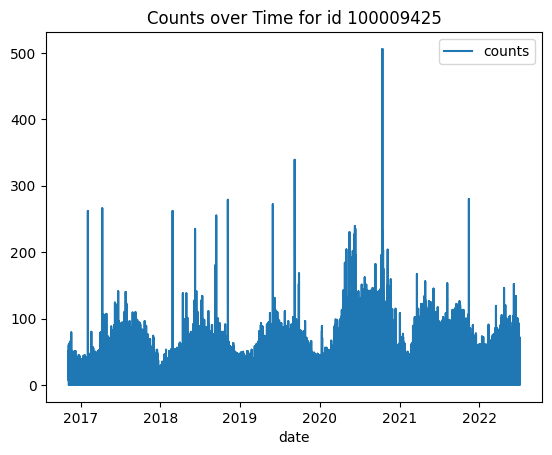

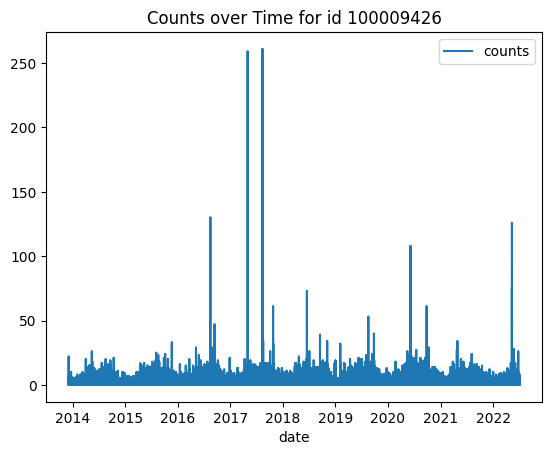

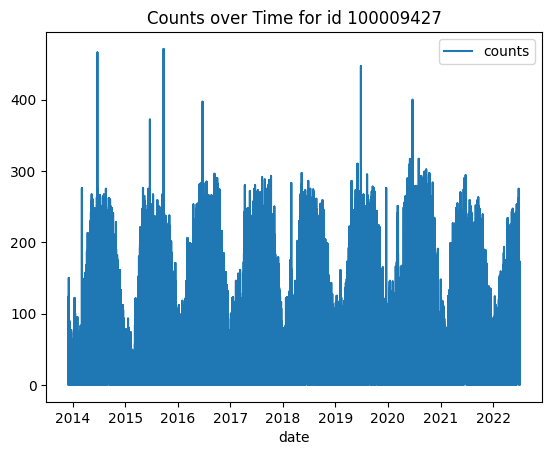

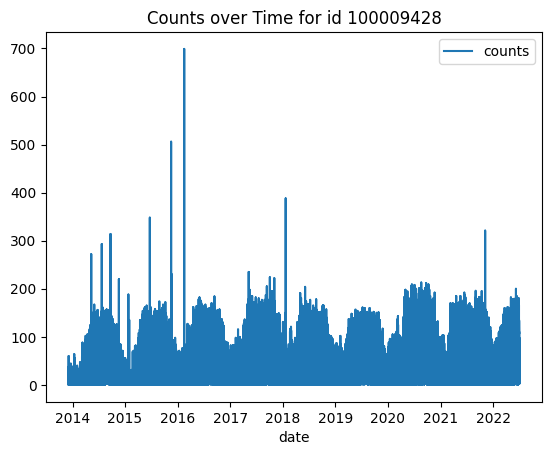

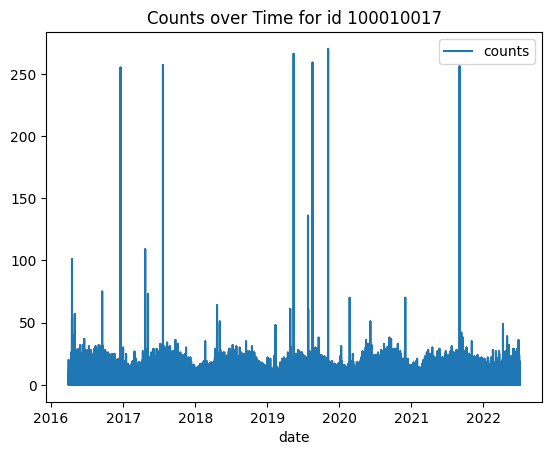

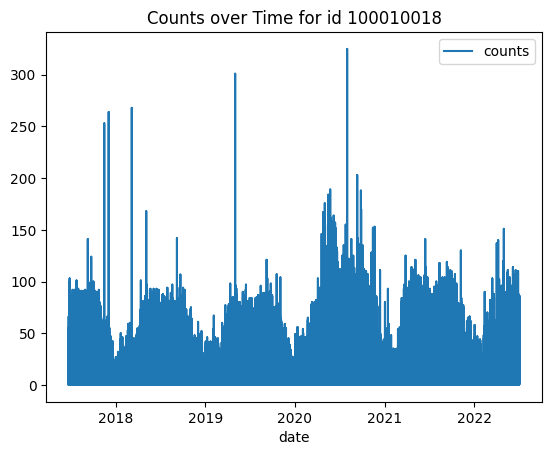

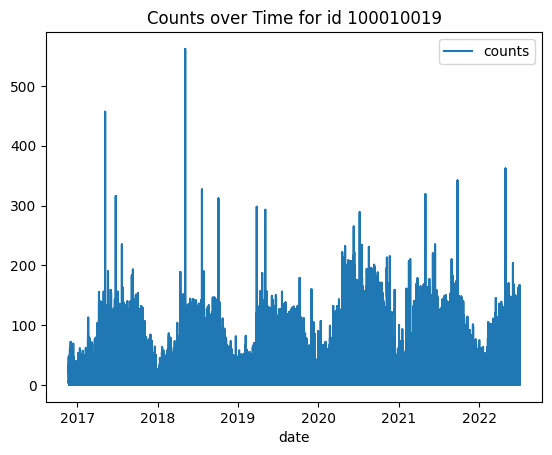

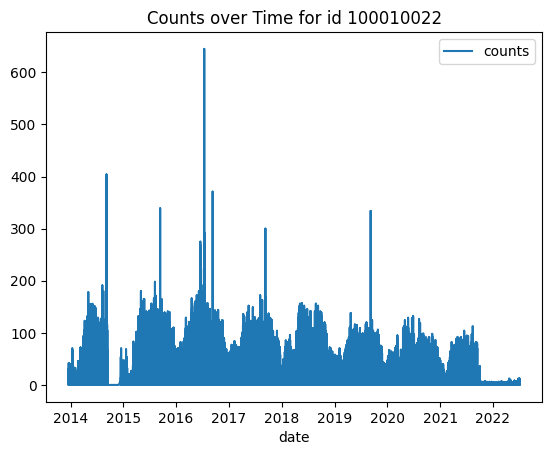

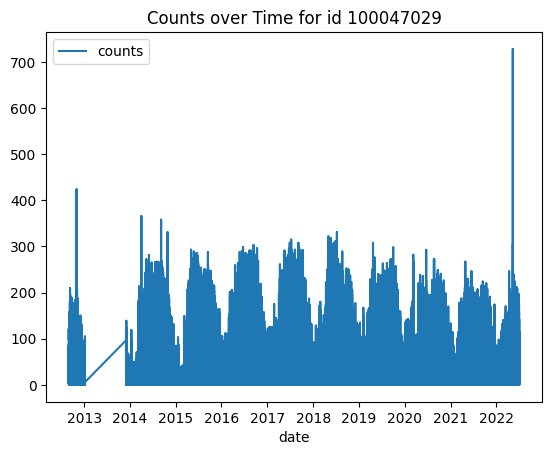

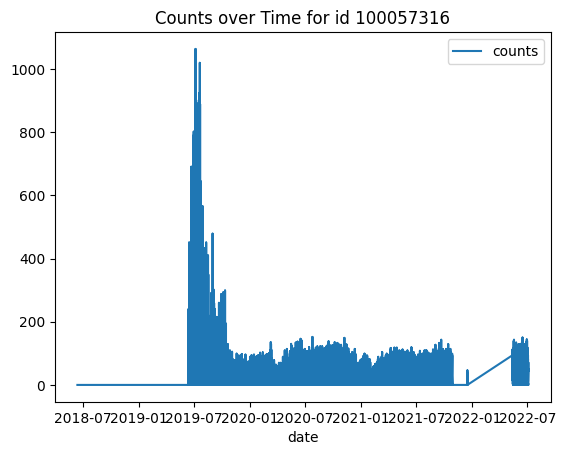

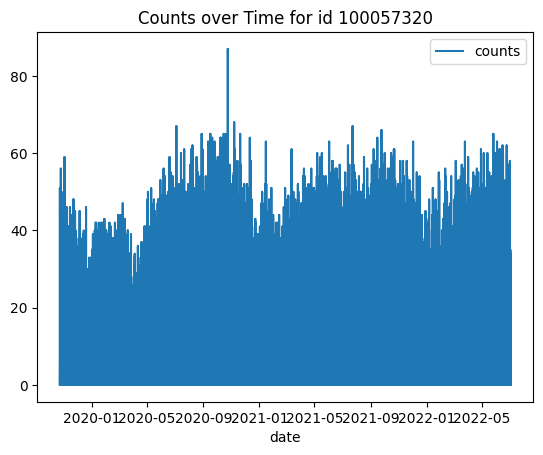

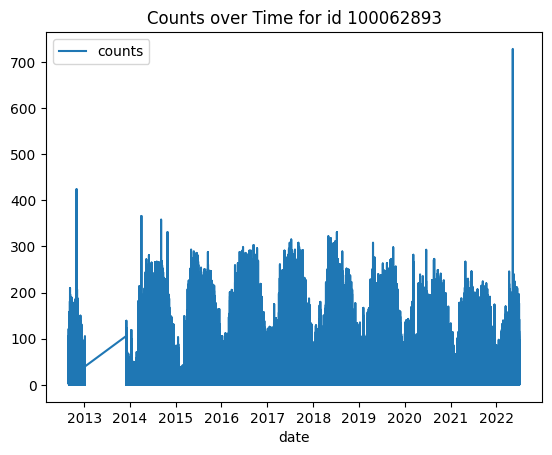

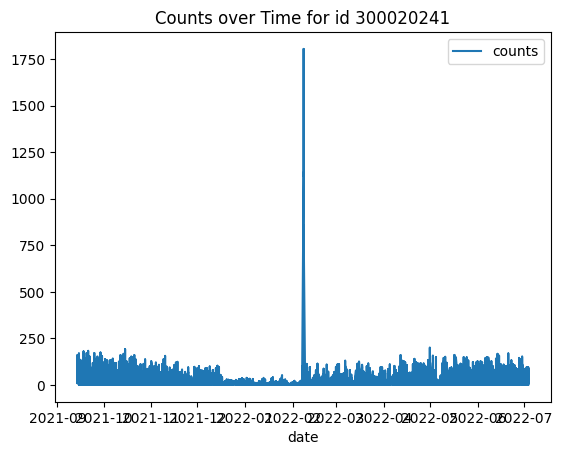

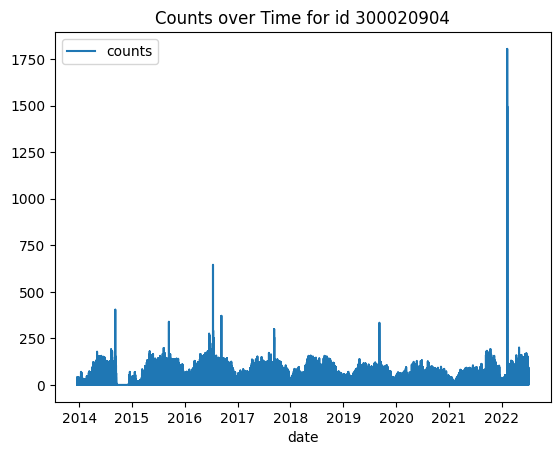

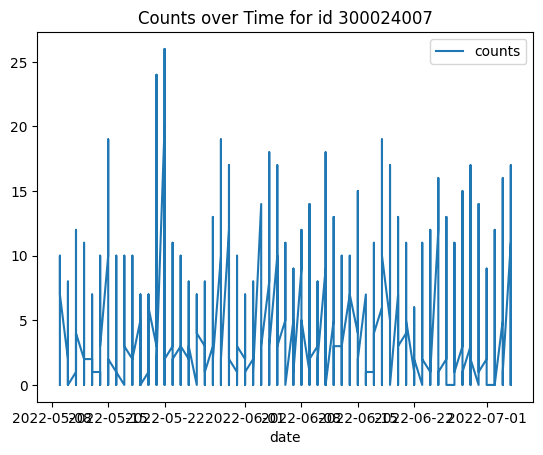

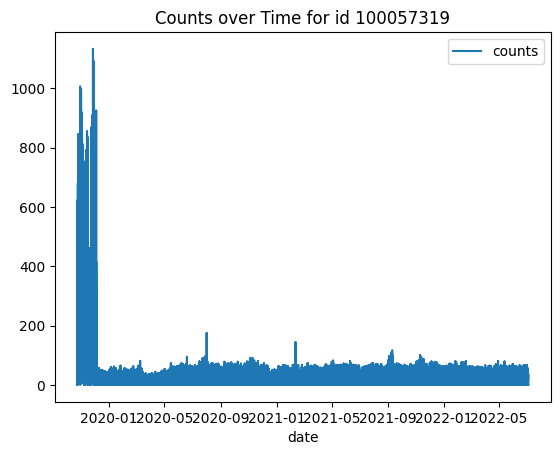

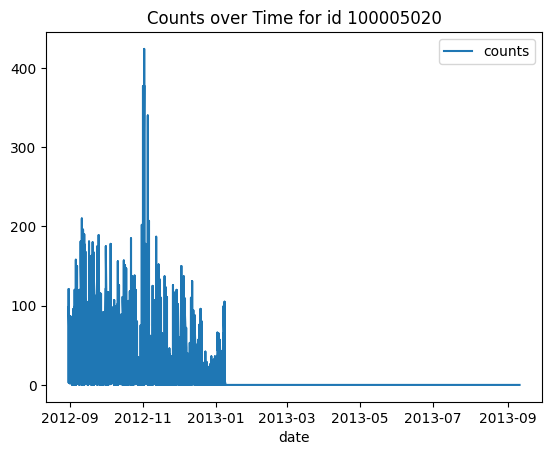

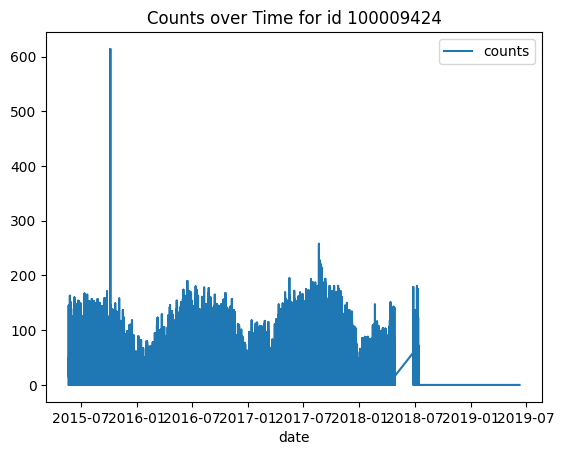

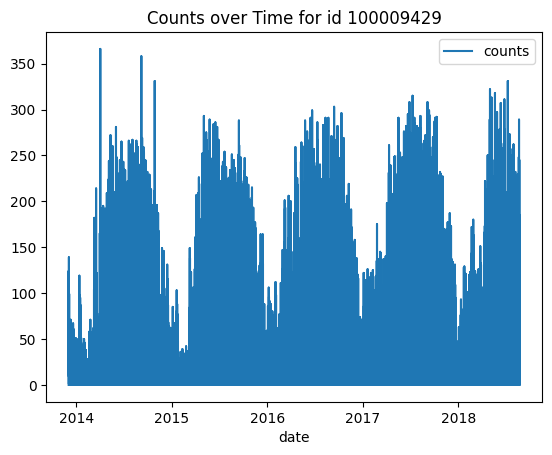

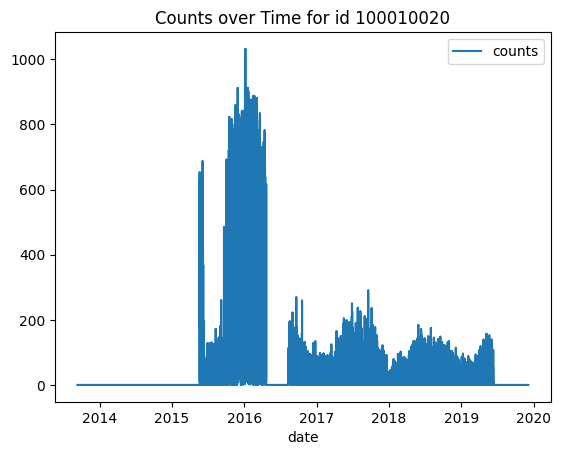

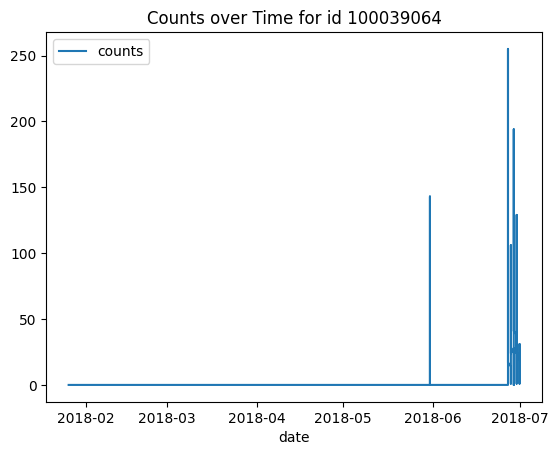

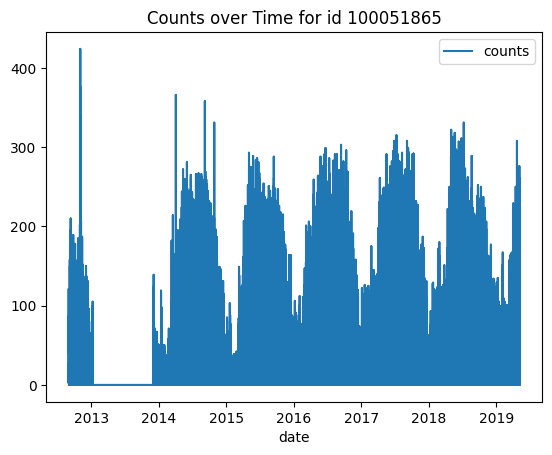

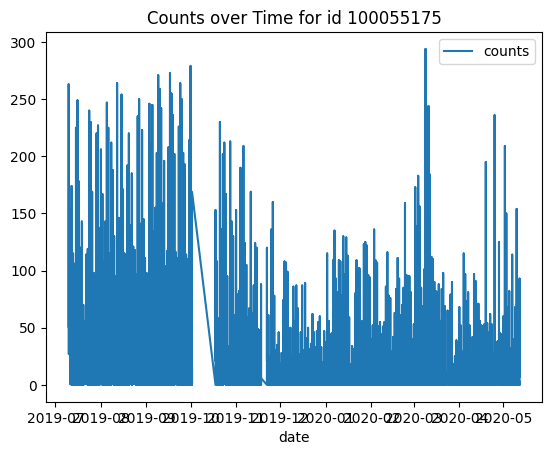

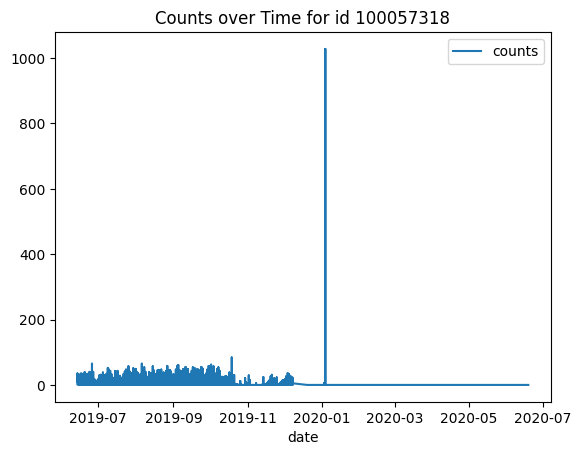

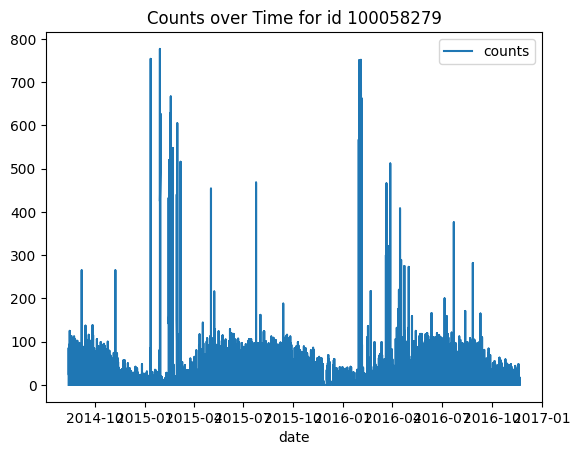

In [63]:
# Visualizing Data for Each ID
import matplotlib.pyplot as plt

for unique_id in unique_ids:
    subset = cleaned_ny_bicycle_counts[cleaned_ny_bicycle_counts['id'] == unique_id]
    subset.plot(x='date', y='counts', title=f"Counts over Time for id {unique_id}")
    plt.show()

In [64]:
import os

# Define the directory where you want to save the CSV file
output_directory = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York'

# Specify the full file path, including the directory and filename
csv_file_path = os.path.join(output_directory, 'cleaned_ny_bicycle_counts.csv')

# Export the DataFrame to the specified file path
cleaned_ny_bicycle_counts.to_csv(csv_file_path, index=False)

### New York Bicycle Parking

## Summary of Data Cleaning and Transformation Steps

### Handling Missing Values:
##### Replaced NaN values with "unknown" in the columns 'STREETON', 'XSTREET1', 'XSTREET2', and 'SIDE'.

### Creating Cleaned Data Frame:
##### Created a new data frame with cleaned data.
##### Dropped duplicate rows from this data frame.
##### Resulting number of rows after removing duplicates: 12,169.

#### Simplifying Data for Geographic Analysis:
##### Dropped the columns 'STREETON', 'XSTREET1', 'XSTREET2', and 'SIDE' to simplify the data set.
##### This step was taken to focus on separating data specific to New York areas.
##### Retained unique borough names: ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'].

### Future Steps:
##### Suggested renaming of column names for better clarity, pending a thorough understanding of the metadata.

In [65]:
# View the DataFrame
ny_bicycle_parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30178 entries, 0 to 30177
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BoroCode    30178 non-null  int64 
 1   BoroName    30178 non-null  object
 2   CounDist    30178 non-null  int64 
 3   AssemDist   30178 non-null  int64 
 4   StSenDist   30178 non-null  int64 
 5   CongDist    30178 non-null  int64 
 6   STREETON    17710 non-null  object
 7   XSTREET1    21881 non-null  object
 8   XSTREET2    21771 non-null  object
 9   SIDE        18395 non-null  object
 10  ASSETSUBTY  30178 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.5+ MB


In [66]:
# Replace NaN values with 'Unknown' in specified columns
columns_to_fill = ['STREETON', 'XSTREET1', 'XSTREET2', 'SIDE']
ny_bicycle_parking[columns_to_fill] = ny_bicycle_parking[columns_to_fill].fillna('Unknown')

print("\nFirst Few Rows After Replacing NaN values:")
print(ny_bicycle_parking.head())


First Few Rows After Replacing NaN values:
   BoroCode   BoroName  CounDist  AssemDist  StSenDist  CongDist  STREETON  \
0         1  Manhattan        10         72         31        13  W 207 ST   
1         3   Brooklyn        35         57         25         9   Unknown   
2         4     Queens        29         27         16         6    108 ST   
3         4     Queens        29         27         16         6    108 ST   
4         1  Manhattan         1         66         26        10   Unknown   

      XSTREET1      XSTREET2     SIDE  ASSETSUBTY  
0     BROADWAY     COOPER ST        S  Small Hoop  
1      Unknown       Unknown  Unknown  Large Hoop  
2        63 RD         63 DR        W  Small Hoop  
3        63 RD         63 DR        W  Small Hoop  
4  BLEECKER ST  W HOUSTON ST        W      U-Rack  


In [67]:
# Rename the columns for better clarification 
ny_bicycle_parking = ny_bicycle_parking.rename(columns={
    "BoroCode": "BoroughCode",
    "BoroName": "BoroughName",
    "CounDist": "CouncilDistrict",
    "AssemDist": "AssemblyDistrict",
    "StSenDist": "StateSenateDistrict",
    "CongDist": "CongressionalDistrict",
    "STREETON": "StreetName",
    "XSTREET1": "IntersectingStreet1",
    "XSTREET2": "IntersectingStreet2",
    "SIDE": "StreetSide",
    "ASSETSUBTY": "AssetType"
})

# Display the Results
print(ny_bicycle_parking.head())

   BoroughCode BoroughName  CouncilDistrict  AssemblyDistrict  \
0            1   Manhattan               10                72   
1            3    Brooklyn               35                57   
2            4      Queens               29                27   
3            4      Queens               29                27   
4            1   Manhattan                1                66   

   StateSenateDistrict  CongressionalDistrict StreetName IntersectingStreet1  \
0                   31                     13   W 207 ST            BROADWAY   
1                   25                      9    Unknown             Unknown   
2                   16                      6     108 ST               63 RD   
3                   16                      6     108 ST               63 RD   
4                   26                     10    Unknown         BLEECKER ST   

  IntersectingStreet2 StreetSide   AssetType  
0           COOPER ST          S  Small Hoop  
1             Unknown    Unknown  

In [68]:
# Drop duplicates and name the new DataFrame as cleaned_ny_bicycle_parking
cleaned_ny_bicycle_parking = ny_bicycle_parking.drop_duplicates()

# Print the cleaned DataFrame
print("cleaned_ny_bicycle_parking DataFrame:")
print(cleaned_ny_bicycle_parking)

# Check the number of rows and columns
print(f"Number of rows after removing duplicates: {len(cleaned_ny_bicycle_parking)}")
print(f"Number of columns: {len(cleaned_ny_bicycle_parking.columns)}")

cleaned_ny_bicycle_parking DataFrame:
       BoroughCode BoroughName  CouncilDistrict  AssemblyDistrict  \
0                1   Manhattan               10                72   
1                3    Brooklyn               35                57   
2                4      Queens               29                27   
4                1   Manhattan                1                66   
5                3    Brooklyn               35                57   
...            ...         ...              ...               ...   
30123            3    Brooklyn               46                59   
30132            3    Brooklyn               35                57   
30135            3    Brooklyn               46                59   
30138            3    Brooklyn               35                57   
30167            3    Brooklyn               35                57   

       StateSenateDistrict  CongressionalDistrict         StreetName  \
0                       31                     13           W

In [69]:
# View the Column Names
column_names = cleaned_ny_bicycle_parking.columns
print(column_names)

Index(['BoroughCode', 'BoroughName', 'CouncilDistrict', 'AssemblyDistrict',
       'StateSenateDistrict', 'CongressionalDistrict', 'StreetName',
       'IntersectingStreet1', 'IntersectingStreet2', 'StreetSide',
       'AssetType'],
      dtype='object')


In [70]:
# List Unique Values in the BoroName Column
unique_BoroughName = cleaned_ny_bicycle_parking['BoroughName'].unique()
print("Unique BoroughName:", unique_BoroughName)

Unique BoroughName: ['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']


In [71]:
import os

# Define the directory where you want to save the CSV file
output_directory = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York'

# Specify the full file path, including the directory and filename
csv_file_path = os.path.join(output_directory, 'cleaned_ny_bicycle_parking.csv')

# Export the DataFrame to the specified file path
cleaned_ny_bicycle_parking.to_csv(csv_file_path, index=False)

### NY Bicycle Routes

## Summary of Data Cleaning and Transformation Steps

### Missing Values in the Column"ft_facilit" :
##### In the bicycle routes dataset, there was a column named "ft_facilit."
##### Replaced Missing Values with 'Unknown'

### Identifying Duplicates:
##### There were 17,812 rows that were exactly the same as others. 
##### Decided to display duplicates for investigation before removing them.

### Removing Duplicates:
##### After reviewing, removed these duplicate rows from the dataset. And, renamed the data frame as cleaned_ny_bicyle_routes

### Future Steps:
##### Suggested renaming of column names for better clarity, pending a thorough understanding of the metadata.

In [72]:
# View the DataFrame
ny_bicycle_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20824 entries, 0 to 20823
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   segmentid   20824 non-null  object
 1   boro        20824 non-null  int64 
 2   street      20824 non-null  object
 3   fromstreet  20824 non-null  object
 4   tostreet    20824 non-null  object
 5   bikedir     20824 non-null  object
 6   lanecount   20824 non-null  int64 
 7   ft_facilit  15430 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [73]:
# Rename the columns
ny_bicycle_routes = ny_bicycle_routes.rename(columns={
    'segmentid': 'SegmentID',
    'boro': 'Borough',
    'street': 'Street',
    'fromstreet': 'FromStreet',
    'tostreet': 'ToStreet',
    'bikedir': 'BikeDirection',
    'lanecount': 'LaneCount',
    'ft_facilit': 'FacilityType'
})

# Display the Results
print(ny_bicycle_routes.head())

  SegmentID  Borough                          Street  FromStreet  \
0        53        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
1        57        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
2        59        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
3        61        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   
4        64        5  CONFERENCE HOUSE PARK GREENWAY  HYLAN BLVD   

        ToStreet BikeDirection  LaneCount FacilityType  
0  SWINNERTON ST             2          2     Greenway  
1  SWINNERTON ST             2          2     Greenway  
2  SWINNERTON ST             2          2     Greenway  
3  SWINNERTON ST             2          2     Greenway  
4  SWINNERTON ST             2          2     Greenway  


In [74]:
print("Missing values before cleaning:")
print(ny_bicycle_routes.isnull().sum())

Missing values before cleaning:
SegmentID           0
Borough             0
Street              0
FromStreet          0
ToStreet            0
BikeDirection       0
LaneCount           0
FacilityType     5394
dtype: int64


In [75]:
# Checking for duplicates
duplicate_rows = ny_bicycle_routes.duplicated()

# Counting the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

print(f"Number of duplicate rows: {num_duplicate_rows}")

Number of duplicate rows: 26


In [76]:
# Finding duplicate rows 
duplicate_rows = ny_bicycle_routes.duplicated(keep='first')

# Counting the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

# Displaying the duplicate rows
if num_duplicate_rows > 0:
    print("\nDuplicate Rows:")
    print(ny_bicycle_routes[duplicate_rows])

Number of duplicate rows: 26

Duplicate Rows:
       SegmentID  Borough                      Street  \
19480          0        5         BROOKFIELD PARK GWY   
19481          0        5         BROOKFIELD PARK GWY   
19482          0        5         BROOKFIELD PARK GWY   
19483          0        5         BROOKFIELD PARK GWY   
19484          0        5         BROOKFIELD PARK GWY   
19485          0        5         BROOKFIELD PARK GWY   
19486          0        5         BROOKFIELD PARK GWY   
19487          0        5         BROOKFIELD PARK GWY   
19488          0        5         BROOKFIELD PARK GWY   
19489          0        5         BROOKFIELD PARK GWY   
19490          0        5         BROOKFIELD PARK GWY   
19491          0        5         BROOKFIELD PARK GWY   
19492          0        5         BROOKFIELD PARK GWY   
19493          0        5         BROOKFIELD PARK GWY   
19495          0        5         BROOKFIELD PARK GWY   
19630     91.573        4                 

In [77]:
# Drop all duplicate rows
cleaned_ny_bicycle_routes = ny_bicycle_routes.drop_duplicates(keep='first')

# Print the number of duplicate rows that were removed
number_of_duplicates_dropped = len(ny_bicycle_routes) - len(cleaned_ny_bicycle_routes)
print(f"Number of duplicate rows dropped: {number_of_duplicates_dropped}")

Number of duplicate rows dropped: 26


In [78]:
# View the Column Names
column_names = cleaned_ny_bicycle_routes.columns
print(column_names)

Index(['SegmentID', 'Borough', 'Street', 'FromStreet', 'ToStreet',
       'BikeDirection', 'LaneCount', 'FacilityType'],
      dtype='object')


In [79]:
# Print the cleaned DataFrame
print(cleaned_ny_bicycle_routes)

      SegmentID  Borough                          Street       FromStreet  \
0            53        5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
1            57        5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
2            59        5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
3            61        5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
4            64        5  CONFERENCE HOUSE PARK GREENWAY       HYLAN BLVD   
...         ...      ...                             ...              ...   
20819   233.514        4                   NORTHERN BLVD  DOUGLASTON PKWY   
20820   233.466        4                   CROSS IS PKWY    NORTHERN BLVD   
20821   163.713        3                   VANDERBILT AV       PACIFIC ST   
20822   163.714        3                   VANDERBILT AV       PACIFIC ST   
20823   163.712        3                   VANDERBILT AV       PACIFIC ST   

            ToStreet BikeDirection  LaneCount    FacilityType  
0      SWIN

In [80]:
import os

# Define the directory where you want to save the CSV file
output_directory = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/New York'

# Specify the full file path, including the directory and filename
csv_file_path = os.path.join(output_directory, 'cleaned_ny_bicycle_routes.csv')

# Export the DataFrame to the specified file path
cleaned_ny_bicycle_routes.to_csv(csv_file_path, index=False)

### Sydney Bicycle Routes

## Summary of Steps

### syd_bicycle_count_sites DataFrame:

##### Each row is uniquely identified by OBJECTID and SiteID.
##### The OBJECTID and SiteID columns contain no duplicate values.
##### There are no missing values in these columns.
##### OBJECTID and SiteID columns are not identical. So I kept both columns

In [85]:
# View the DataFrame
syd_bicycle_count_sites.head()

,Longitude,Latitude,Index,LocationID,IntersectionLocation
0,151.204168,-33.882846,1,1,"Intersection of Broadway, Lee Street, Quay Str..."
1,151.208601,-33.878286,2,2,Intersection of Castlereagh Street and Goulbur...
2,151.205783,-33.863364,3,3,Intersection of Grosvenor Street and Glouceste...
3,151.209897,-33.873292,4,4,Intersection of Elizabeth Street and Park Street
4,151.209083,-33.879797,5,5,"Intersection of Elizabeth Street, Wentworth Av..."


In [82]:
# Check if OBJECTID and SiteID have the same values across all rows
columns_are_identical = syd_bicycle_count_sites['OBJECTID'].equals(syd_bicycle_count_sites['SiteID'])

if columns_are_identical:
    print("OBJECTID and SiteID columns are identical. One of them can be dropped.")
    # Drop one of the columns, for example, SiteID
    syd_bicycle_count_sites = syd_bicycle_count_sites.drop('SiteID', axis=1)
else:
    print("OBJECTID and SiteID columns are not identical.")

OBJECTID and SiteID columns are not identical.


In [83]:
# Rename the Column Names
syd_bicycle_count_sites = syd_bicycle_count_sites.rename(columns={
    'X': 'Longitude',
    'Y': 'Latitude',
    'OBJECTID': 'Index',
    'SiteID': 'LocationID',
    'Intersection': 'IntersectionLocation'
})

# View the DataFrame
syd_bicycle_count_sites.head()

,Longitude,Latitude,Index,LocationID,IntersectionLocation
0,151.204168,-33.882846,1,1,"Intersection of Broadway, Lee Street, Quay Str..."
1,151.208601,-33.878286,2,2,Intersection of Castlereagh Street and Goulbur...
2,151.205783,-33.863364,3,3,Intersection of Grosvenor Street and Glouceste...
3,151.209897,-33.873292,4,4,Intersection of Elizabeth Street and Park Street
4,151.209083,-33.879797,5,5,"Intersection of Elizabeth Street, Wentworth Av..."


In [86]:
# Rename the DataFrame
cleaned_syd_bicycle_count_sites = syd_bicycle_count_sites

# View the DataFrame
cleaned_syd_bicycle_count_sites.head()

,Longitude,Latitude,Index,LocationID,IntersectionLocation
0,151.204168,-33.882846,1,1,"Intersection of Broadway, Lee Street, Quay Str..."
1,151.208601,-33.878286,2,2,Intersection of Castlereagh Street and Goulbur...
2,151.205783,-33.863364,3,3,Intersection of Grosvenor Street and Glouceste...
3,151.209897,-33.873292,4,4,Intersection of Elizabeth Street and Park Street
4,151.209083,-33.879797,5,5,"Intersection of Elizabeth Street, Wentworth Av..."


In [88]:
import os

# Define the directory where you want to save the CSV file
output_directory = '/Users/haticegormez/Downloads/Group_4_Team_Project/Data/EP_Data/Sydney'

# Specify the full file path, including the directory and filename
csv_file_path = os.path.join(output_directory, 'cleaned_syd_bicycle_count_sites.csv')

# Export the DataFrame to the specified file path
cleaned_syd_bicycle_count_sites.to_csv(csv_file_path, index=False)

### Sydney Bicycle Count Surveys

### For syd_bicycle_count_surveys DataFrame:

##### The ObjectId2 column is a unique identifier with no duplicates, ensuring the integrity of the dataset.
##### There are no missing values in the ObjectId2 column.

In [89]:
# View the DataFrame
syd_bicycle_count_surveys.head()

,SiteID,Month,Year,TotalCount,ObjectId2,Time_0600,Time_0700,Time_0800,Time_1600,Time_1700,Time_1800
0,51,March,2010,263,1,12,45,56,27,56,67
1,1,October,2015,383,2,37,69,100,47,68,62
2,52,March,2010,136,3,7,18,31,29,30,21
3,53,March,2010,333,4,25,86,93,15,62,52
4,2,October,2015,447,5,32,75,72,56,114,98


In [90]:
# View the Column Names
column_names = syd_bicycle_count_surveys.columns
print(column_names)

Index(['SiteID', 'Month', 'Year', 'TotalCount', 'ObjectId2', 'Time_0600',
       'Time_0700', 'Time_0800', 'Time_1600', 'Time_1700', 'Time_1800'],
      dtype='object')


In [91]:
# Rename the Column Names
syd_bicycle_count_surveys = syd_bicycle_count_surveys.rename(columns={
    'SiteID': 'SiteID',
    'Month': 'Month',
    'Year': 'Year',
    'TotalCount': 'Total number of bicycles',
    'ObjectId2': 'ObjectId2',
    'Time_0600': 'Time_06:00',
    'Time_0700': 'Time_07:00',
    'Time_0800': 'Time_08:00',
    'Time_1600': 'Time_16:00',
    'Time_1700': 'Time_17:00',
    'Time_1800': 'Time_18:00'
})

# View the DataFrame
syd_bicycle_count_surveys.head()

,SiteID,Month,Year,Total number of bicycles,ObjectId2,Time_06:00,Time_07:00,Time_08:00,Time_16:00,Time_17:00,Time_18:00
0,51,March,2010,263,1,12,45,56,27,56,67
1,1,October,2015,383,2,37,69,100,47,68,62
2,52,March,2010,136,3,7,18,31,29,30,21
3,53,March,2010,333,4,25,86,93,15,62,52
4,2,October,2015,447,5,32,75,72,56,114,98


In [92]:
# Check for missing values
missing_values = syd_bicycle_count_surveys.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 SiteID                      0
Month                       0
Year                        0
Total number of bicycles    0
ObjectId2                   0
Time_06:00                  0
Time_07:00                  0
Time_08:00                  0
Time_16:00                  0
Time_17:00                  0
Time_18:00                  0
dtype: int64


In [93]:
# Check for uniqueness in 'ObjectId2'
objectid2_duplicates = syd_bicycle_count_surveys['ObjectId2'].duplicated().any()
print("Duplicates in 'ObjectId2': ", objectid2_duplicates)

Duplicates in 'ObjectId2':  False


In [94]:
# Rename the DataFrame
cleaned_syd_bicycle_count_surveys = syd_bicycle_count_surveys

# View the DataFrame
cleaned_syd_bicycle_count_surveys.head()

,SiteID,Month,Year,Total number of bicycles,ObjectId2,Time_06:00,Time_07:00,Time_08:00,Time_16:00,Time_17:00,Time_18:00
0,51,March,2010,263,1,12,45,56,27,56,67
1,1,October,2015,383,2,37,69,100,47,68,62
2,52,March,2010,136,3,7,18,31,29,30,21
3,53,March,2010,333,4,25,86,93,15,62,52
4,2,October,2015,447,5,32,75,72,56,114,98


In [95]:
# View the Column Names
column_names = cleaned_syd_bicycle_count_surveys.columns
print(column_names)

Index(['SiteID', 'Month', 'Year', 'Total number of bicycles', 'ObjectId2',
       'Time_06:00', 'Time_07:00', 'Time_08:00', 'Time_16:00', 'Time_17:00',
       'Time_18:00'],
      dtype='object')
